In [1]:
%load_ext autoreload
%autoreload 2

from geographiclib.geodesic import Geodesic
import math
from q_learning_agent import QTableAgent
from aircraft_env import Location
# from  geopy.geocoders import Nominatim
from aircraft_env import AircraftEnv
from utils.geodesic import Location
from utils.env_extra import env_summary
import pandas as pd
import numpy as np
geod = Geodesic.WGS84  # define the WGS84 ellipsoid

In [16]:

# geolocator = Nominatim(user_agent='myapplication')
# # city ="Agra"
# # country ="India"
# loc_1 = geolocator.geocode('Montréal–Trudeau International Airport')
# print("latitude is :-" ,loc_1.latitude,"\nlongtitude is:-" ,loc_1.longitude)

# loc_2 = geolocator.geocode('Charles de Gaulle Airport')
# print("latitude is :-" ,loc_2.latitude,"\nlongtitude is:-" ,loc_2.longitude)
loc_1 = Location(45.46873715, -73.74257166095532)
loc_2 = Location(49.0068908, 2.5710819691019156)
loc_1, loc_2
env = AircraftEnv(arrival_location=loc_1, destination=loc_2, n_waypoints=9)


In [17]:
df = env_summary(env)  
df

,trajectory,waypoint,speed,tas,distance,wind_magnitude,wind_direction,course,correction_angle,altitude,time_for_distance,fuel_burn,total_time,reward,fuel_flow
0,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0
1,0,1,234.212024,230.586637,699708.284530,3.930965,71.027558,48.473464,-0.374644,10000.0,2987.499416,1214.319217,2987.499416,-214.319217,0.4064667630405116
2,4,2,234.749810,238.504667,721127.190525,6.226919,204.544757,78.063226,-1.202855,10304.8,3071.896796,1291.734289,6059.396212,-291.734289,0.42050054882168564
3,2,3,233.396833,236.575900,699738.696167,42.473547,332.308323,61.412636,10.341372,10000.0,2998.064235,1269.925170,9057.460447,-269.925170,0.423581708087185
4,0,4,215.389604,228.530242,699811.663637,39.637985,173.071102,68.616407,-9.669057,10609.6,3249.050335,1252.263784,12306.510781,-252.263784,0.3854245562990019
5,1,5,224.429824,230.154205,694457.953821,35.106116,184.117391,89.130542,-8.740275,11219.2,3094.321162,1154.355669,15400.831943,-154.355669,0.37305619171590687
6,1,6,218.430326,237.434018,692674.276029,19.104725,279.880104,93.733036,0.493671,10609.6,3171.145189,1297.149172,18571.977132,-297.149172,0.4090475505448553
7,4,7,231.584007,228.530242,604245.114458,7.828844,176.332651,110.185990,-1.795441,10609.6,2609.183256,1005.643299,21181.160388,-5.643299,0.3854245562990019
8,2,8,254.432300,239.570532,787675.775988,20.316740,147.639570,106.235590,-3.215228,10000.0,3095.816748,1338.507413,24276.977136,9661.492587,0.4323600269443407


In [4]:
df['fuel_burn'].sum()

0

In [21]:
loc_1 = Location(45.46873715, -73.74257166095532)
loc_2 = Location(49.0068908, 2.5710819691019156)
loc_1, loc_2

env = AircraftEnv(arrival_location=loc_1, destination=loc_2, n_waypoints=9)

agent = QTableAgent(env,  episode_number=10000,  epsilon_delta=4000, mach_delta=0.01, checkpoint=None,
                    save_dir='saved_models/saved_9.npy')
agent.train()

Episode: 36 | Episode Reward -30000 | Epsilone 0.9913752881417681:   0%|          | 18/10000 [00:00<00:57, 172.60it/s]             

States (Trajectory, Waypoints, Altitude) 5 x 9 x 8 / 360
Action (Trajectory, Altitude Step, Mach Number) 5 x 5 x 6 / 360
Q Table (5, 9, 8, 5, 5, 6) / 54000


Episode: 9999 | Episode Reward 8878.567040108594 | Epsilone 0.09130479087169044: 100%|██████████| 10000/10000 [01:17<00:00, 128.57it/s] 


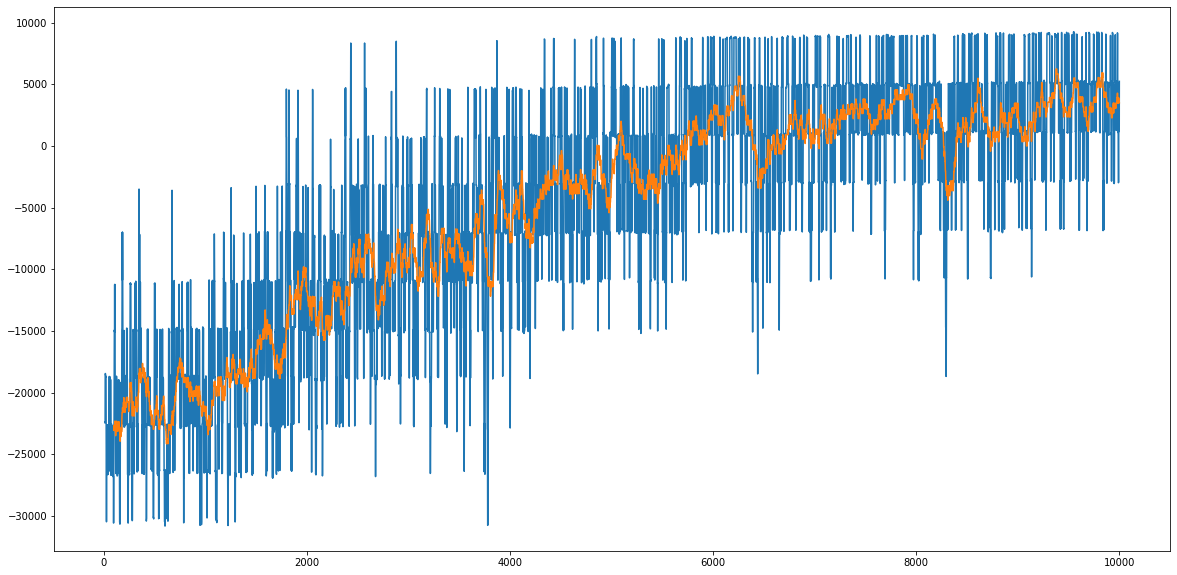

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
rewards = np.array(agent.rewards)

plt.rcParams["figure.figsize"] = (20,10)

pd.Series(rewards).rolling(window = 10).mean().plot()
pd.Series(rewards).rolling(window =100).mean().plot()
plt.show()



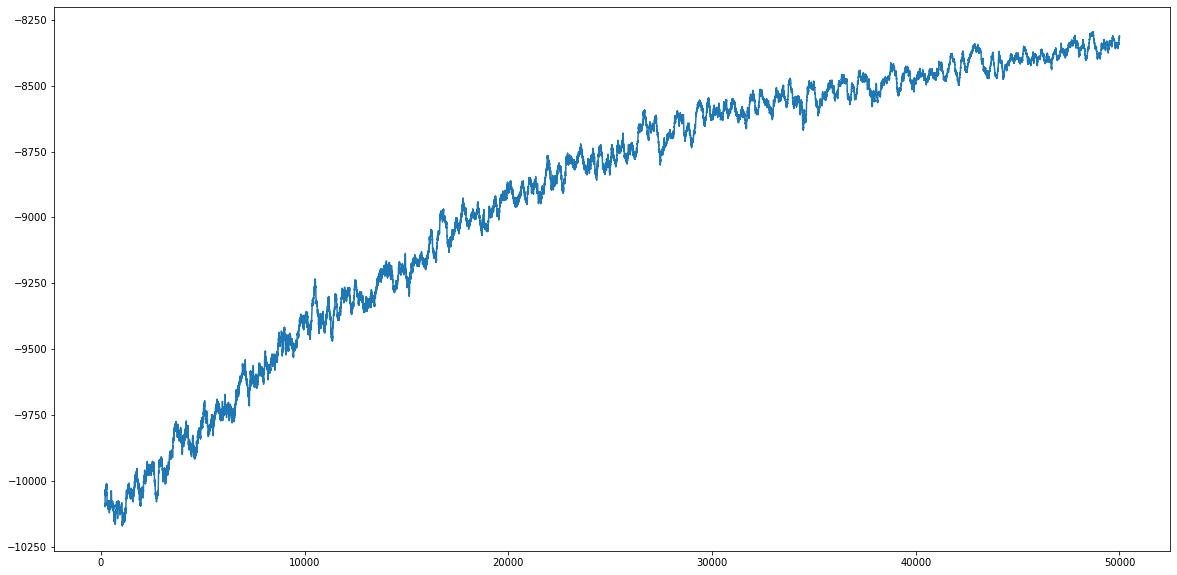

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import make_interp_spline, BSpline
rewards = np.array(agent.rewards)
# 300 represents number of points to make between T.min and T.max
# xnew = np.linspace(rewards.min(), rewards.max(), len(rewards)) 
plt.rcParams["figure.figsize"] = (20,10)

pd.Series(rewards).rolling(window =200).mean().plot()
# spl = make_interp_spline(np.arange(len(rewards)), rewards, k=5)  # type: BSpline
# power_smooth = spl(np.arange(len(rewards)))
plt.rcParams["figure.figsize"] = (20,10)
# plt.plot(rewards)
# plt.show()


In [23]:
import pandas as pd
df = env_summary(env, agent=agent)        
df

,trajectory,waypoint,speed,tas,distance,wind_magnitude,wind_direction,course,correction_angle,altitude,time_for_distance,fuel_burn,total_time,reward,fuel_flow
0,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0
1,2,1,226.401026,222.594392,692678.387980,3.930965,71.027558,56.703470,-0.250334,10609.6,3059.519652,1133.293167,3059.519652,-133.293167,0.37041539049684047
2,1,2,220.592424,221.302120,694429.134740,5.769508,322.006729,58.329457,1.484823,11219.2,3148.018962,1109.842511,6207.538615,-109.842511,0.35255267651377875
3,0,3,218.852412,221.302120,694421.546201,13.545263,326.163992,64.844214,3.468860,11828.8,3173.012997,1068.573510,9380.551611,-68.573510,0.3367693454495536
4,0,4,218.884311,221.302120,692627.408837,37.808945,165.255611,76.520012,-9.834687,11219.2,3164.353832,1115.601413,12544.905443,-115.601413,0.35255267651377875
5,0,5,213.004071,221.302120,692627.637617,35.106116,184.117391,84.993634,-9.011188,11524.0,3251.710793,1119.854579,15796.616236,-119.854579,0.3443893538786107
6,1,6,201.917641,221.302120,694441.061280,19.820748,290.504402,97.887515,1.120982,11828.8,3439.229268,1158.226989,19235.845504,-158.226989,0.3367693454495536
7,0,7,223.466290,221.302120,787065.270658,7.828844,176.332651,103.347147,-1.938565,11828.8,3522.076065,1186.127251,22757.921569,-186.127251,0.3367693454495536
8,2,8,248.823830,221.302120,599373.980373,27.839582,122.362339,114.192916,-1.024281,11828.8,2408.828692,811.219662,25166.750261,10188.780338,0.3367693454495536


In [24]:
df['fuel_burn'].sum()

8702.739081804475

In [20]:
fuels = []
for i in range(10000):
    df = env_summary(env, agent=None)        

    burned_fuel = df['fuel_burn'].sum()
    fuels.append(burned_fuel)

In [25]:
min(fuels)

8834.144463738028

(array([  14.,  170.,  537., 1172., 1676., 2106., 2246., 1529.,  500.,
          50.]),
 array([ 8834.14446374,  8985.07597668,  9136.00748962,  9286.93900256,
         9437.8705155 ,  9588.80202844,  9739.73354138,  9890.66505432,
        10041.59656726, 10192.52808021, 10343.45959315]),
 <BarContainer object of 10 artists>)

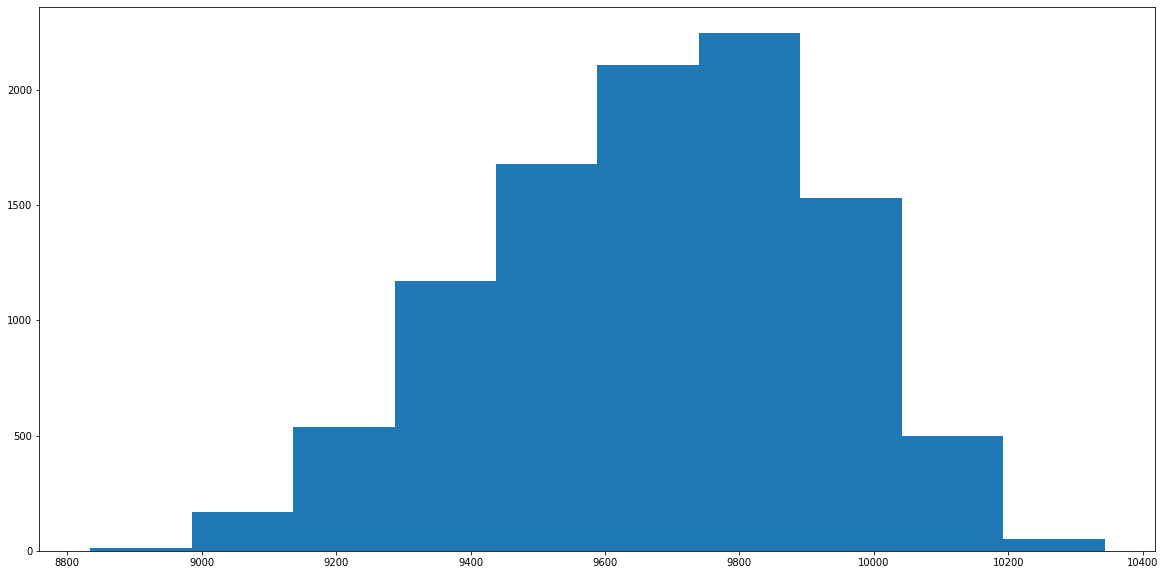

In [27]:
plt.hist(fuels)